In [1]:
# Modules :

from pyforest import *
from tqdm import tqdm
import warnings
from IPython.display import Image
import re
warnings.filterwarnings("ignore")
%matplotlib inline

![title](Merchant_Banking.png)

# AmExpert 2019 – Machine Learning Hackathon


## Introduction
American Express and Analytics Vidhya presents “AmExpert 2019 – Machine Learning Hackathon”. An amazing opportunity to showcase your analytical abilities and talent.

Get a taste of the kind of challenges we face here at American Express on day to day basis.

Exciting prizes up for grabs! Best performers also get a chance to get interviewed by American Express for analytics roles!

Don’t hold on to the buzzing ideas in your mind. Just wear your thinking hats and display the spectrum of your creativity!


# Problem Statement

## Predicting Coupon Redemption

XYZ Credit Card company regularly helps it’s merchants understand their data better and take key business decisions accurately by providing machine learning and analytics consulting. ABC is an established Brick & Mortar retailer that frequently conducts marketing campaigns for its diverse product range. As a merchant of XYZ, they have sought XYZ to assist them in their discount marketing process using the power of machine learning. Can you wear the AmExpert hat and help out ABC?

 
Discount marketing and coupon usage are very widely used promotional techniques to attract new customers and to retain & reinforce loyalty of existing customers. The measurement of a consumer’s propensity towards coupon usage and the prediction of the redemption behaviour are crucial parameters in assessing the effectiveness of a marketing campaign.

 
ABC’s promotions are shared across various channels including email, notifications, etc. A number of these campaigns include coupon discounts that are offered for a specific product/range of products. The retailer would like the ability to predict whether customers redeem the coupons received across channels, which will enable the retailer’s marketing team to accurately design coupon construct, and develop more precise and targeted marketing strategies.

 
The data available in this problem contains the following information, including the details of a sample of campaigns and coupons used in previous campaigns -

**User Demographic Details**

**Campaign and coupon Details**

**Product details**

**Previous transactions**


Based on previous transaction & performance data from the last 18 campaigns, predict the probability for the next 10 campaigns in the test set for each coupon and customer combination, whether the customer will redeem the coupon or not?

 

### Dataset Description

Here is the schema for the different data tables available. The detailed data dictionary is provided next.

![title](amex19.png)

You are provided with the following files in train.zip:

**train.csv:** Train data containing the coupons offered to the given customers under the 18 campaigns

|Variable |Definition |
|----|----|
|id	|Unique id for coupon customer impression|
|campaign_id	|Unique id for a discount campaign|
|coupon_id	|Unique id for a discount coupon|
|customer_id	|Unique id for a customer|
|redemption_status|	(target) (0 - Coupon not redeemed, 1 - Coupon redeemed) |


**campaign_data.csv:** Campaign information for each of the 28 campaigns

|Variable|	Definition|
|----|----|
|campaign_id	|Unique id for a discount campaign|
|campaign_type	|Anonymised Campaign Type (X/Y)|
|start_date	|Campaign Start Date|
|end_date	|Campaign End Date |


**coupon_item_mapping.csv:** Mapping of coupon and items valid for discount under that coupon

|Variable|	Definition|
|----|----|
|coupon_id	|Unique id for a discount coupon (no order)|
|item_id	|Unique id for items for which given coupon is valid (no order) |


**customer_demographics.csv:** Customer demographic information for some customers

|Variable	|Definition|
|----|----|
|customer_id	|Unique id for a customer|
|age_range	|Age range of customer family in years|
|marital_status|	Married/Single|
|rented|	0 - not rented accommodation, 1 - rented accommodation|
|family_size|	Number of family members|
|no_of_children	|Number of children in the family|
|income_bracket|	Label Encoded Income Bracket (Higher income corresponds to higher number) |


**customer_transaction_data.csv:** Transaction data for all customers for duration of campaigns in the train data

|Variable	|Definition|
|----|----|
|date	|Date of Transaction|
|customer_id|Unique id for a customer|
|item_id|	Unique id for item|
|quantity	|quantity of item bought|
|selling_price	|Sales value of the transaction|
|other_discount|	Discount from other sources such as manufacturer coupon/loyalty card|
|coupon_discount|	Discount availed from retailer coupon |


**item_data.csv:** Item information for each item sold by the retailer

|Variable|	Definition|
|----|----|
|item_id|	Unique id for itemv
|brand	|Unique id for item brand|
|brand_type	|Brand Type (local/Established)|
|category	|Item Category |


**test.csv:** Contains the coupon customer combination for which redemption status is to be predicted

|Variable|	Definition|
|----|----|
|id	|Unique id for coupon customer impression|
|campaign_id	|Unique id for a discount campaign|
|coupon_id	|Unique id for a discount coupon|
|customer_id	|Unique id for a customer |

*Campaign, coupon and customer data for test set is also contained in train.zip *

**sample_submission.csv:** This file contains the format in which you have to submit your predictions.

To summarise the entire process:

* Customers receive coupons under various campaigns and may choose to redeem it.
* They can redeem the given coupon for any valid product for that coupon as per coupon item mapping within the duration between campaign start date and end date
* Next, the customer will redeem the coupon for an item at the retailer store and that will reflect in the transaction table in the column coupon_discount.
 
### Evaluation Metric
Submissions are evaluated on area under the ROC curve between the predicted probability and the observed target.
 

### Public and Private Split
* Test data is further randomly divided into Public (40%) and Private data (60%)
* Your initial responses will be checked and scored on the Public data.
* The final rankings would be based on your private score which will be published once the competition is over.

In [2]:
# Importing Datasets :

campaign_data = pd.read_csv(r'D:\MOOCs & Material\Data Science & ML\Data Modelling - Datasets\American Express (AmExpert) - Analytics vidhya\Datasets\campaign_data.csv')
coupon_item_mapping = pd.read_csv(r'D:\MOOCs & Material\Data Science & ML\Data Modelling - Datasets\American Express (AmExpert) - Analytics vidhya\Datasets\coupon_item_mapping.csv')
customer_demographs = pd.read_csv(r'D:\MOOCs & Material\Data Science & ML\Data Modelling - Datasets\American Express (AmExpert) - Analytics vidhya\Datasets\customer_demographics.csv')
customer_transaction_data = pd.read_csv(r'D:\MOOCs & Material\Data Science & ML\Data Modelling - Datasets\American Express (AmExpert) - Analytics vidhya\Datasets\customer_transaction_data.csv')
item_data = pd.read_csv(r'D:\MOOCs & Material\Data Science & ML\Data Modelling - Datasets\American Express (AmExpert) - Analytics vidhya\Datasets\item_data.csv')
train = pd.read_csv(r'D:\MOOCs & Material\Data Science & ML\Data Modelling - Datasets\American Express (AmExpert) - Analytics vidhya\Datasets\train.csv')
test = pd.read_csv(r'D:\MOOCs & Material\Data Science & ML\Data Modelling - Datasets\American Express (AmExpert) - Analytics vidhya\Datasets\test.csv')

<h2>OBJECTIVE :</h2>

Based on previous transaction & performance data from the last **18** campaigns, predict the probability for the next **10** campaigns in the test set for each coupon and customer combination, whether the customer will redeem the coupon or not?

<h2>Performing EDA for </h2>

+ Campaign_Data
+ Coupon_Item_Mapping
+ Item_data
+ Customer_Transaction_Data 

### *Campaign Data :* 

In [3]:
campaign_data.head()

,campaign_id,campaign_type,start_date,end_date
0,24,Y,21/10/13,20/12/13
1,25,Y,21/10/13,22/11/13
2,20,Y,07/09/13,16/11/13
3,23,Y,08/10/13,15/11/13
4,21,Y,16/09/13,18/10/13


In [4]:
campaign_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 4 columns):
campaign_id      28 non-null int64
campaign_type    28 non-null object
start_date       28 non-null object
end_date         28 non-null object
dtypes: int64(1), object(3)
memory usage: 1.0+ KB


In [5]:
len(campaign_data)

28

In [6]:
# Total no of unique campaign ids :

campaign_data.campaign_id.nunique()

28

In [7]:
# For train set, there are 18 campaign_ids and therefore we need to predict for 10 campigns of the test set :

count_by_train = 0

for each in train.campaign_id.unique():
    if each in campaign_data.campaign_id.unique():
        count_by_train+=1
        
print('count_by_train : ', count_by_train)

count_by_test = 0

for each in test.campaign_id.unique():
    if each in campaign_data.campaign_id.unique():
        count_by_test+=1
        
print('count_by_test : ', count_by_test)

count_by_train :  18
count_by_test :  10


In [8]:
# FEATURE - Campaign_Type :

print('Unique No of campaign_type :', campaign_data.campaign_type.nunique())
print('Types No of campaign_type :', campaign_data.campaign_type.unique())

Unique No of campaign_type : 2
Types No of campaign_type : ['Y' 'X']


In [9]:
# Converting to datetime for the 'start_date' and the 'end_date' of the campaigns :

campaign_data.start_date = pd.to_datetime(campaign_data.start_date)
campaign_data.end_date = pd.to_datetime(campaign_data.end_date)

In [10]:
campaign_data.head()

,campaign_id,campaign_type,start_date,end_date
0,24,Y,2013-10-21,2013-12-20
1,25,Y,2013-10-21,2013-11-22
2,20,Y,2013-07-09,2013-11-16
3,23,Y,2013-08-10,2013-11-15
4,21,Y,2013-09-16,2013-10-18


## *Train Data:*

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78369 entries, 0 to 78368
Data columns (total 5 columns):
id                   78369 non-null int64
campaign_id          78369 non-null int64
coupon_id            78369 non-null int64
customer_id          78369 non-null int64
redemption_status    78369 non-null int64
dtypes: int64(5)
memory usage: 3.0 MB


In [12]:
train.head()

,id,campaign_id,coupon_id,customer_id,redemption_status
0,1,13,27,1053,0
1,2,13,116,48,0
2,6,9,635,205,0
3,7,13,644,1050,0
4,9,8,1017,1489,0


In [13]:
len(train)

78369

In [14]:
# More than one data points of each customer(customer_id) :

train.groupby('customer_id').agg({'customer_id':'count'}).head() # COUNT 

,customer_id
customer_id,
1,94
3,42
4,23
5,52
6,32


>   In train data, more than 1 data point is present for the same customer_id

>   More than one type of coupon is applied by each customer over the campaigns

## *Customer Transaction Data:*

In [15]:
customer_transaction_data.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0
3,2012-01-02,1501,33647,1,67.32,0.00,0.0
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0


In [16]:
# More than one data points of each customer(customer_id) :

customer_transaction_data.groupby('customer_id').agg({'customer_id':'count'}).head() # COUNT 

,customer_id
customer_id,
1,1048
2,419
3,705
4,220
5,792


>   In customer_transaction_data, more than 1 data point is present for the same customer_id.

>   More than one transaction has been performed by each customer over the campaigns.

In [17]:
# Aggregrating transaction featurs for each customer_id(customer) :

# More than one data points of each customer(customer_id) :

customer_transaction_data_groupBy = customer_transaction_data.groupby('customer_id').agg({'selling_price':['mean', 'max', 'min', 'sum'],
                                                     'other_discount':['mean', 'max', 'min', 'sum'],
                                                      'coupon_discount':['mean', 'max', 'min', 'sum']})  

In [18]:
customer_transaction_data_groupBy.head()

selling_price                            other_discount       \
                     mean      max    min        sum           mean  max   
customer_id                                                                
1               94.001842   445.25  12.11   98513.93     -16.250382  0.0   
2              102.864033   640.80  14.25   43100.03     -16.830430  0.0   
3              103.617404   862.00   8.90   73050.27     -22.714227  0.0   
4              154.423727  1330.05  14.25   33973.22     -13.305409  0.0   
5              130.827146  1485.35  12.11  103615.10     -13.657917  0.0   

                              coupon_discount                        
                min       sum            mean  max     min      sum  
customer_id                                                          
1           -372.23 -17030.40       -2.019876  0.0 -106.86 -2116.83  
2           -312.03  -7051.95       -0.595084  0.0  -89.05  -249.34  
3           -463.06 -16013.53       -3.091546  0.0 -142.48 -2179.54  
4           -390.04  -2927.19       -0.404773  0.0  -89.05   -89.05  
5           -216.21 -10817.07       -0.114684  0.0  -71.24   -90.83

## *Customer Demographs:*

In [19]:
customer_demographs.head()

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,Married,0,2,NaN,4
1,6,46-55,Married,0,2,NaN,5
2,7,26-35,NaN,0,3,1,3
3,8,26-35,NaN,0,4,2,6
4,10,46-55,Single,0,1,NaN,5


In [20]:
customer_demographs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 7 columns):
customer_id       760 non-null int64
age_range         760 non-null object
marital_status    431 non-null object
rented            760 non-null int64
family_size       760 non-null object
no_of_children    222 non-null object
income_bracket    760 non-null int64
dtypes: int64(3), object(4)
memory usage: 41.7+ KB


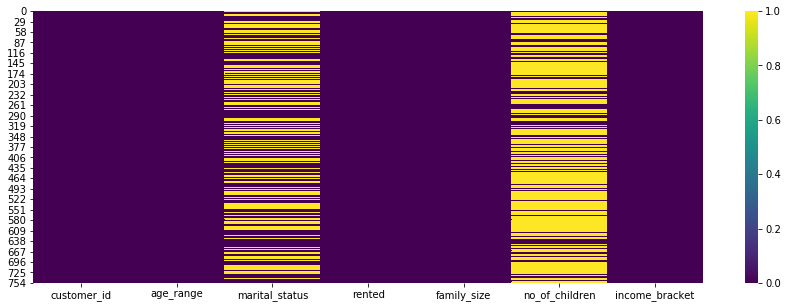

In [21]:
# Evaluation for nulls in 'customer_demographs' :

plt.figure(figsize=(15, 5))
sns.heatmap(customer_demographs.isnull(), cmap='viridis')

>   **Maritial_status** & **No_of_Children** are found to be containing Nulls :

###  Feature 'no_of_children' imputation  :

In [22]:
customer_demographs.head()

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,Married,0,2,NaN,4
1,6,46-55,Married,0,2,NaN,5
2,7,26-35,NaN,0,3,1,3
3,8,26-35,NaN,0,4,2,6
4,10,46-55,Single,0,1,NaN,5


In [23]:
# Replacing the 'NaN' with string 'NaN' for analysing distributions :

customer_demographs['no_of_children'] = customer_demographs['no_of_children'].apply(lambda x:'NaN' if str(x)=='nan' else x)
customer_demographs['marital_status'] = customer_demographs['marital_status'].apply(lambda x:'NaN' if str(x)=='nan' else x)

In [24]:
# 538 null values in 'no_of_childern' feature which we need to impute : 

customer_demographs['no_of_children'].value_counts()

NaN    538
1      107
3+      60
2       55
Name: no_of_children, dtype: int64

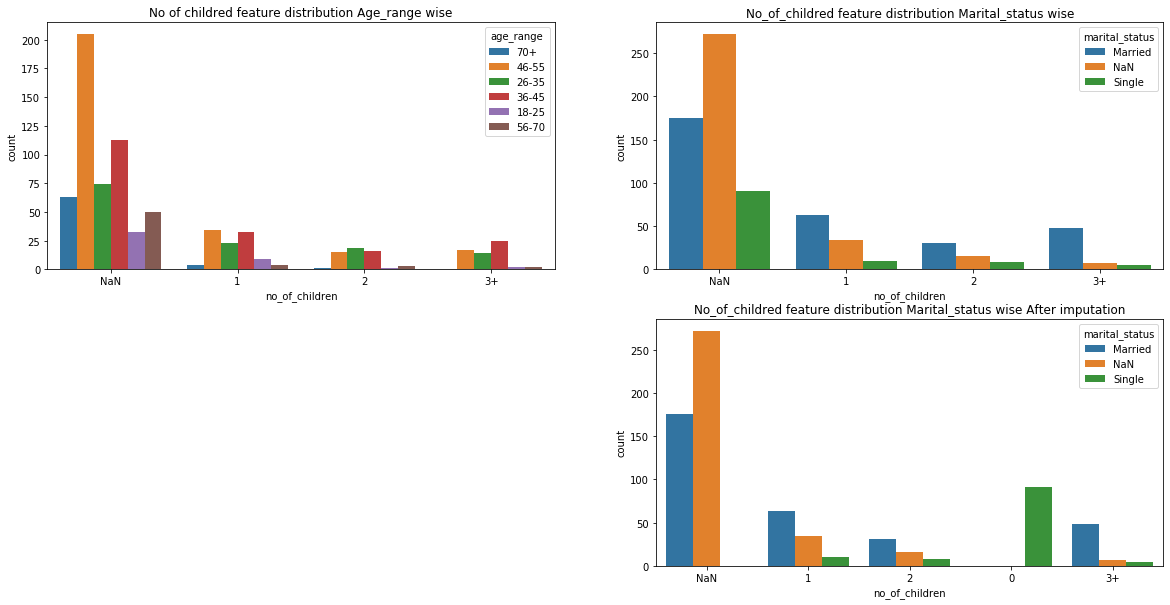

In [25]:
# No of nulls in 'no_of_children', 'age_range' wise :

plt.figure(figsize=(20, 10))

plt.subplot(2,2,1)
plt.title('No of childred feature distribution Age_range wise')
sns.countplot(data=customer_demographs, x='no_of_children', hue='age_range')

# No of nulls in 'no_of_children', 'marital_status' wise :

plt.subplot(2,2,2)
plt.title('No_of_childred feature distribution Marital_status wise')
sns.countplot(data=customer_demographs, x='no_of_children', hue='marital_status')



# if marital_status='single':   set no_of_childern='0'

for i in range(len(customer_demographs)):
    
    if (customer_demographs.loc[i, 'marital_status']=='Single') and (customer_demographs.loc[i, 'no_of_children']=='NaN'):
        customer_demographs.loc[i, 'no_of_children']='0'  # '0' as in string
        
        
# No of nulls in 'no_of_children', 'marital_status' wise :

plt.subplot(2,2,4)
plt.title('No_of_childred feature distribution Marital_status wise After imputation')
sns.countplot(data=customer_demographs, x='no_of_children', hue='marital_status')      

> 1.) For the **'no_of_children'** as Null, we imputed the same to be '0' where the ***martial status*** is 'Single'.

> 2.) For the ***'no_of_children'*** as Null, and ***marital_status***='Married', we shall impute according to the feature "age_range". 

In [26]:
customer_demographs.no_of_children.value_counts()

NaN    447
1      107
0       91
3+      60
2       55
Name: no_of_children, dtype: int64

In [27]:
customer_demographs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 7 columns):
customer_id       760 non-null int64
age_range         760 non-null object
marital_status    760 non-null object
rented            760 non-null int64
family_size       760 non-null object
no_of_children    760 non-null object
income_bracket    760 non-null int64
dtypes: int64(3), object(4)
memory usage: 41.7+ KB


In [28]:
customer_demographs[(customer_demographs['no_of_children']!='NaN') & 
                                            (customer_demographs['marital_status']=='Married')& 
                                            (customer_demographs['age_range']=='18-25')]

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
57,110,18-25,Married,0,3,1,6
186,377,18-25,Married,1,3,1,4
380,775,18-25,Married,0,3,1,2
475,965,18-25,Married,1,3,1,4
539,1121,18-25,Married,0,3,1,5


In [29]:
# Where no_of_children= "not null('NaN')" and marital_status='Married' and with different age_range :


impute_children_age_married_PLUS_46_55 = customer_demographs[(customer_demographs['no_of_children']!='NaN') & 
                                            (customer_demographs['marital_status']=='Married')& 
                                            (customer_demographs['age_range']=='46-55')]

impute_children_age_married_PLUS_70plus = customer_demographs[(customer_demographs['no_of_children']!='NaN') & 
                                            (customer_demographs['marital_status']=='Married')& 
                                            (customer_demographs['age_range']=='70+')]

impute_children_age_married_PLUS_26_35 = customer_demographs[(customer_demographs['no_of_children']!='NaN') & 
                                            (customer_demographs['marital_status']=='Married')& 
                                            (customer_demographs['age_range']=='26-35')]

impute_children_age_married_PLUS_36_45 = customer_demographs[(customer_demographs['no_of_children']!='NaN') & 
                                            (customer_demographs['marital_status']=='Married')& 
                                            (customer_demographs['age_range']=='36-45')]

impute_children_age_married_PLUS_56_70 = customer_demographs[(customer_demographs['no_of_children']!='NaN') & 
                                            (customer_demographs['marital_status']=='Married')& 
                                            (customer_demographs['age_range']=='56-70')]

impute_children_age_married_PLUS_18_25 = customer_demographs[(customer_demographs['no_of_children']!='NaN') & 
                                            (customer_demographs['marital_status']=='Married')& 
                                            (customer_demographs['age_range']=='18-25')]

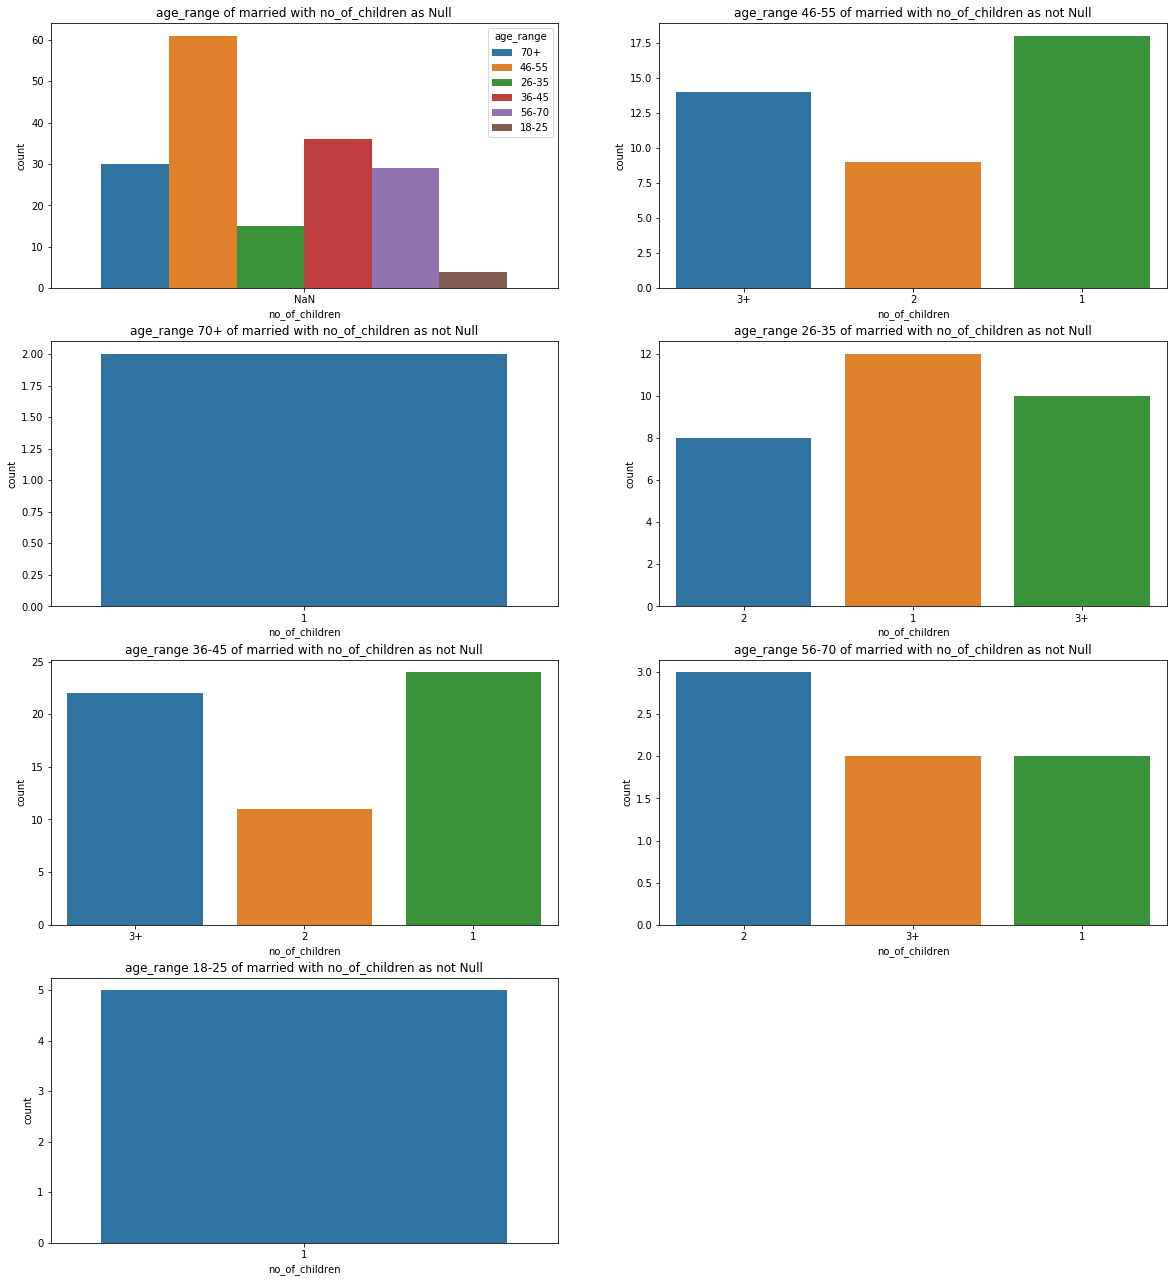

In [30]:
# ('No_of_Children' is not 'NaN', null) AND (marital_status='married') AND (age_range=###) 

impute_children_age = customer_demographs[(customer_demographs['no_of_children']=='NaN') & 
                                          (customer_demographs['marital_status']=='Married')]

plt.figure(figsize=(20, 40))

plt.subplot(7,2,1)
plt.title('age_range of married with no_of_children as Null')
sns.countplot(data=impute_children_age, x='no_of_children', hue='age_range')

plt.subplot(7,2,2)
plt.title('age_range 46-55 of married with no_of_children as not Null')
sns.countplot(data=impute_children_age_married_PLUS_46_55, x='no_of_children')

plt.subplot(7,2,3)
plt.title('age_range 70+ of married with no_of_children as not Null')
sns.countplot(data=impute_children_age_married_PLUS_70plus, x='no_of_children')

plt.subplot(7,2,4)
plt.title('age_range 26-35 of married with no_of_children as not Null')
sns.countplot(data=impute_children_age_married_PLUS_26_35, x='no_of_children')

plt.subplot(7,2,5)
plt.title('age_range 36-45 of married with no_of_children as not Null')
sns.countplot(data=impute_children_age_married_PLUS_36_45, x='no_of_children')

plt.subplot(7,2,6)
plt.title('age_range 56-70 of married with no_of_children as not Null')
sns.countplot(data=impute_children_age_married_PLUS_56_70, x='no_of_children')

plt.subplot(7,2,7)
plt.title('age_range 18-25 of married with no_of_children as not Null')
sns.countplot(data=impute_children_age_married_PLUS_18_25, x='no_of_children')

In [31]:
# Feature imputation according to the maximum occurences of the 'age_range' class values in 'married' and 'no_of_children' is null:


customer_demographs.ix[(customer_demographs['no_of_children']=='NaN') & 
                        (customer_demographs['marital_status']=='Married')& 
                        (customer_demographs['age_range']=='70+'), 'no_of_children'] = '1'  

customer_demographs.ix[(customer_demographs['no_of_children']=='NaN') & 
                        (customer_demographs['marital_status']=='Married')& 
                        (customer_demographs['age_range']=='46-55'), 'no_of_children'] = '1'

customer_demographs.ix[(customer_demographs['no_of_children']=='NaN') & 
                        (customer_demographs['marital_status']=='Married')& 
                        (customer_demographs['age_range']=='26-35'), 'no_of_children'] = '1'

customer_demographs.ix[(customer_demographs['no_of_children']=='NaN') & 
                        (customer_demographs['marital_status']=='Married')& 
                        (customer_demographs['age_range']=='36-45'), 'no_of_children'] = '1'

customer_demographs.ix[(customer_demographs['no_of_children']=='NaN') & 
                        (customer_demographs['marital_status']=='Married')& 
                        (customer_demographs['age_range']=='56-70'), 'no_of_children'] = '2'

customer_demographs.ix[(customer_demographs['no_of_children']=='NaN') & 
                        (customer_demographs['marital_status']=='Married')& 
                        (customer_demographs['age_range']=='18-25'), 'no_of_children'] = '1'

In [32]:
# Only 272 'NaN' remains in the 'no_of_children' feature : 

customer_demographs.no_of_children.value_counts()

NaN    272
1      253
0       91
2       84
3+      60
Name: no_of_children, dtype: int64

In [33]:
#  CASE - I : Now the no of points having only no_of_children=='NaN' and marital_status=='NaN' only :

len(customer_demographs[(customer_demographs['no_of_children']=='NaN') & (customer_demographs['marital_status']=='NaN')])

272

In [34]:
# CASE - II : Now the no of points having only no_of_children=='NaN' only :

len(customer_demographs[(customer_demographs['no_of_children']=='NaN')])

272

In [35]:
# CASE - III : Now the no of points having only marital_status=='NaN' only :

len(customer_demographs[(customer_demographs['marital_status']=='NaN') & (customer_demographs['no_of_children']!='NaN')])

57

In [36]:
# Imputing where 'marital_status' is NaN and 'no_of_children' is NaN :

marital_status_AND_no_of_children_NaN = customer_demographs[(customer_demographs['marital_status']=='NaN') & (customer_demographs['no_of_children']=='NaN')]
marital_status_AND_no_of_children_NaN

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
10,17,36-45,NaN,0,1,NaN,5
11,19,46-55,NaN,0,1,NaN,3
14,28,46-55,NaN,0,2,NaN,1
15,30,70+,NaN,0,1,NaN,5
18,35,18-25,NaN,0,2,NaN,4
...,...,...,...,...,...,...,...
744,1545,36-45,NaN,0,2,NaN,8
750,1566,26-35,NaN,0,2,NaN,9
755,1577,36-45,NaN,0,2,NaN,5
757,1579,46-55,NaN,0,1,NaN,4


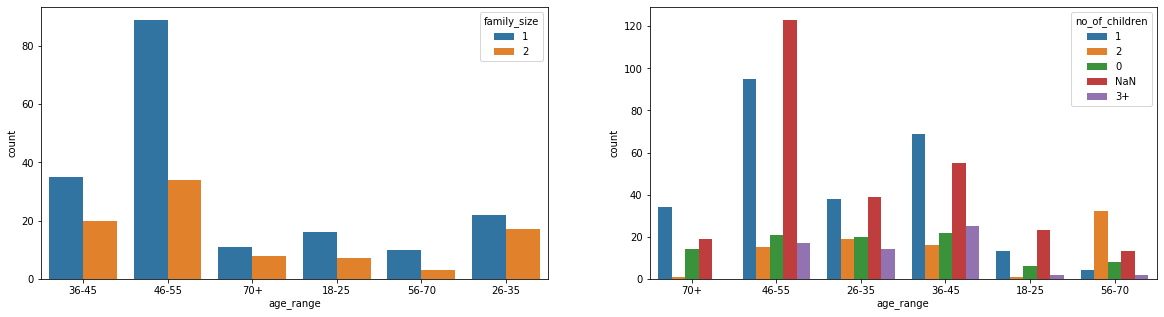

In [37]:
plt.figure(figsize=(20, 5))

plt.subplot(1,2,1)
sns.countplot(data=marital_status_AND_no_of_children_NaN, x='age_range', hue='family_size')

plt.subplot(1,2,2)
sns.countplot(data=customer_demographs, x='age_range', hue='no_of_children')

We want to impute where marital_status & no_of_children are NaN (Nulls) :

+ Now we first attempt to impute 'no_of_children' feature :

> 1.) For the ***age_range*** & ***family_size status*** no defininte inference can be found for imputation.

> 2.) For ***age_range*** vs ***no_of_children***, we will use the 2nd plot to impute 'no_of_children' feature according to maximum present values.

In [38]:
# Feature imputation according to the maximum occurences of the 'age_range' class values in 'marital_status'=Null and 'no_of_children'= null:

# Where 'marital_status'=NaN & 'no_of_children'=NaN, we look by 'age_range' & 'no_of_children' feature (2nd plot): 


customer_demographs.ix[(customer_demographs['no_of_children']=='NaN') & 
                        (customer_demographs['marital_status']=='NaN')& 
                        (customer_demographs['age_range']=='70+'), 'no_of_children'] = '1'  

customer_demographs.ix[(customer_demographs['no_of_children']=='NaN') & 
                        (customer_demographs['marital_status']=='NaN')& 
                        (customer_demographs['age_range']=='46-55'), 'no_of_children'] = '1'

customer_demographs.ix[(customer_demographs['no_of_children']=='NaN') & 
                        (customer_demographs['marital_status']=='NaN')& 
                        (customer_demographs['age_range']=='26-35'), 'no_of_children'] = '1'

customer_demographs.ix[(customer_demographs['no_of_children']=='NaN') & 
                        (customer_demographs['marital_status']=='NaN')& 
                        (customer_demographs['age_range']=='36-45'), 'no_of_children'] = '1'

customer_demographs.ix[(customer_demographs['no_of_children']=='NaN') & 
                        (customer_demographs['marital_status']=='NaN')& 
                        (customer_demographs['age_range']=='56-70'), 'no_of_children'] = '2'

customer_demographs.ix[(customer_demographs['no_of_children']=='NaN') & 
                        (customer_demographs['marital_status']=='NaN')& 
                        (customer_demographs['age_range']=='18-25'), 'no_of_children'] = '1'

> 1.) Where 'marital_status'=NotNull & 'no_of_children'=Null, imputation has been performed. 

> 2.) Where 'marital_status'=Null & 'no_of_children'=Null, imputation has been performed. 

> 3.) Where 'marital_status'=Null & 'no_of_children'=NotNull, imputation is now left. 

In [39]:
# final imputation to perform where 'marital_status'=Null and 'no_of_children'=Not Null :

len(customer_demographs[(customer_demographs['marital_status']=='NaN') & (customer_demographs['no_of_children']!='NaN')])

329

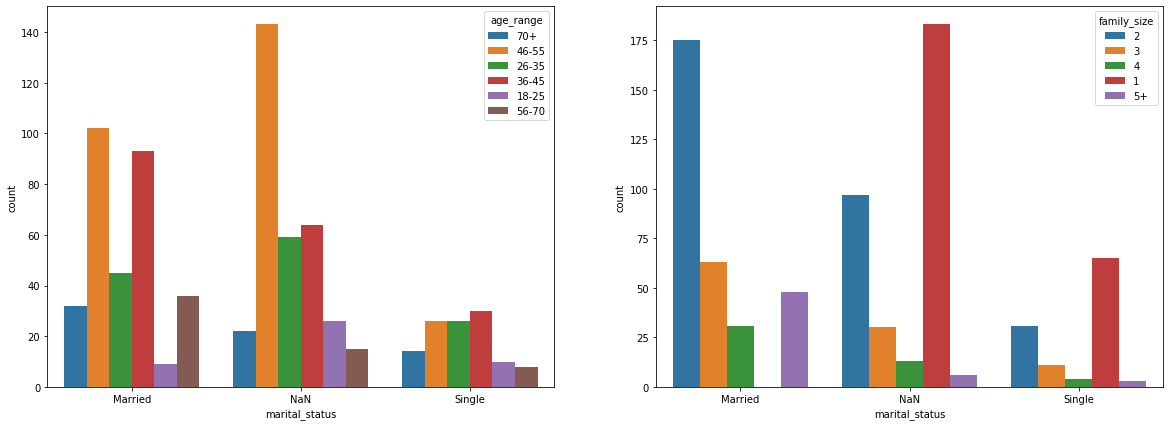

In [40]:
plt.figure(figsize=(20, 7))

plt.subplot(1,2,1)
sns.countplot(data=customer_demographs, x='marital_status', hue='age_range')

plt.subplot(1,2,2)
sns.countplot(data=customer_demographs, x='marital_status', hue='family_size')

>  Since 1st plot does not reveal much for imputing the NaNs in the marital_status, hence we use the 2nd plot to impute the 'NaN' marital_status according to the presence of maximum occurence of values in marital_status : 

> + Where 'family_size'=1 and 'marital_status' is NaN, impute setting marital_status='Single'.

> + Where 'family_size'=5 and 'marital_status' is NaN, impute setting marital_status='Married'.

> + Where 'family_size'=4 and 'marital_status' is NaN, impute setting marital_status='Married'.

> + Where 'family_size'=3 and 'marital_status' is NaN, impute setting marital_status='Married'.

> + Where 'family_size'=2 and 'marital_status' is NaN, impute setting marital_status='Married'.

In [41]:
# Feature imputation according to the rules mentioned above for 'marital_status' only :

customer_demographs.ix[(customer_demographs['family_size']=='1') & 
                        (customer_demographs['marital_status']=='NaN'), 'marital_status'] = 'Single'  

customer_demographs.ix[(customer_demographs['family_size']=='5+') & 
                        (customer_demographs['marital_status']=='NaN'), 'marital_status'] = 'Married'  

customer_demographs.ix[(customer_demographs['family_size']=='4') & 
                        (customer_demographs['marital_status']=='NaN'), 'marital_status'] = 'Married'  

customer_demographs.ix[(customer_demographs['family_size']=='3') & 
                        (customer_demographs['marital_status']=='NaN'), 'marital_status'] = 'Married'  

customer_demographs.ix[(customer_demographs['family_size']=='2') & 
                        (customer_demographs['marital_status']=='NaN'), 'marital_status'] = 'Married'

In [42]:
# Value counts of customer_demographs 'no_of_children':

customer_demographs.no_of_children.value_counts()

1     512
2      97
0      91
3+     60
Name: no_of_children, dtype: int64

In [43]:
# Value counts of customer_demographs 'marital_status':

customer_demographs.marital_status.value_counts()

Married    463
Single     297
Name: marital_status, dtype: int64

#### *Imputation of the 'no_of_children' & 'marital_status' has been accomplished*

### *Coupon_item_mapping & Item_Data :*

In [44]:
coupon_item_mapping.head()

,coupon_id,item_id
0,105,37
1,107,75
2,494,76
3,522,77
4,518,77


In [45]:
item_data.head()

,item_id,brand,brand_type,category
0,1,1,Established,Grocery
1,2,1,Established,Miscellaneous
2,3,56,Local,Bakery
3,4,56,Local,Grocery
4,5,56,Local,Grocery


In [46]:
coup_MERGED_item = coupon_item_mapping.merge(item_data, how='inner', on='item_id')

In [47]:
coup_MERGED_item.head()

,coupon_id,item_id,brand,brand_type,category
0,105,37,56,Local,Grocery
1,6,37,56,Local,Grocery
2,22,37,56,Local,Grocery
3,31,37,56,Local,Grocery
4,107,75,56,Local,Grocery


In [48]:
coup_MERGED_item.brand_type.value_counts()

Established    78759
Local          13904
Name: brand_type, dtype: int64

In [49]:
coup_MERGED_item.category.value_counts()

Grocery                   36466
Pharmaceutical            25061
Natural Products           6819
Meat                       6218
Packaged Meat              6144
Skin & Hair Care           4924
Seafood                    2227
Flowers & Plants           1963
Dairy, Juices & Snacks     1867
Garden                      286
Prepared Food               240
Miscellaneous               184
Bakery                      100
Salads                      100
Travel                       44
Vegetables (cut)             19
Restauarant                   1
Name: category, dtype: int64

In [50]:
coup_MERGED_item_groupBy = coup_MERGED_item.groupby('coupon_id').agg({'category':'count'})
coup_MERGED_item_groupBy.reset_index(inplace=True)
coup_MERGED_item_groupBy.head()

,coupon_id,category
0,1,39
1,2,2
2,3,17
3,4,24
4,5,7


>   One coupon (coupon_id) gets applied on more than one type of item_id and each item_id can have different **(brand_type+category)**

### *Item_Data & Customer_Transaction_Data :*

In [51]:
customer_transaction_data.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0
3,2012-01-02,1501,33647,1,67.32,0.00,0.0
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0


In [52]:
customer_transaction_data.shape

(1324566, 7)

In [53]:
item_data.head()

,item_id,brand,brand_type,category
0,1,1,Established,Grocery
1,2,1,Established,Miscellaneous
2,3,56,Local,Bakery
3,4,56,Local,Grocery
4,5,56,Local,Grocery


In [54]:
item_data.shape

(74066, 4)

In [55]:
customer_transaction_data_groupBy.reset_index(inplace=True)

In [56]:
customer_transaction_data_groupBy.head()

customer_id selling_price                            other_discount       \
                       mean      max    min        sum           mean  max   
0           1     94.001842   445.25  12.11   98513.93     -16.250382  0.0   
1           2    102.864033   640.80  14.25   43100.03     -16.830430  0.0   
2           3    103.617404   862.00   8.90   73050.27     -22.714227  0.0   
3           4    154.423727  1330.05  14.25   33973.22     -13.305409  0.0   
4           5    130.827146  1485.35  12.11  103615.10     -13.657917  0.0   

                    coupon_discount                        
      min       sum            mean  max     min      sum  
0 -372.23 -17030.40       -2.019876  0.0 -106.86 -2116.83  
1 -312.03  -7051.95       -0.595084  0.0  -89.05  -249.34  
2 -463.06 -16013.53       -3.091546  0.0 -142.48 -2179.54  
3 -390.04  -2927.19       -0.404773  0.0  -89.05   -89.05  
4 -216.21 -10817.07       -0.114684  0.0  -71.24   -90.83

In [57]:
customer_transaction_data_groupBy.shape

(1582, 13)

### *Preparing the train set :* 

In [58]:
# train_latest = train + campaign_data :

train_MERGED_campaign_data = train.merge(campaign_data, how='left', on='campaign_id')
train_MERGED_campaign_data.shape

(78369, 8)

In [110]:
train_MERGED_campaign_data.isnull().sum()

id                   0
campaign_id          0
coupon_id            0
customer_id          0
redemption_status    0
campaign_type        0
start_date           0
end_date             0
dtype: int64

In [61]:
# train_latest = train_latest + coup_merged_item
train_MERGED_campaign_data_MERGED_coupon = train_MERGED_campaign_data.merge(coup_MERGED_item_groupBy, how='left', on='coupon_id') 
train_MERGED_campaign_data_MERGED_coupon.shape

(78369, 9)

In [111]:
train_MERGED_campaign_data_MERGED_coupon.isnull().sum()

id                   0
campaign_id          0
coupon_id            0
customer_id          0
redemption_status    0
campaign_type        0
start_date           0
end_date             0
category             0
dtype: int64

In [62]:
# train_latest = train_latest + customer_dempgraphs
train_MERGED_campaign_data_MERGED_coupon_MERGED_customer_demographics = train_MERGED_campaign_data_MERGED_coupon.merge(customer_demographs, 
                                                                                                                      how='left', on='customer_id')
train_MERGED_campaign_data_MERGED_coupon_MERGED_customer_demographics.shape                                                                        

(78369, 15)

In [112]:
train_MERGED_campaign_data_MERGED_coupon_MERGED_customer_demographics.isnull().sum()

id                       0
campaign_id              0
coupon_id                0
customer_id              0
redemption_status        0
campaign_type            0
start_date               0
end_date                 0
category                 0
age_range            34708
marital_status       34708
rented               34708
family_size          34708
no_of_children       34708
income_bracket       34708
dtype: int64

In [63]:
# train_latest = train_latest + customer_transaction_data_merged_item_data
train_MERGED_campaign_data_MERGED_coupon_MERGED_customer_demographics_MERGED_customer_transaction_data = train_MERGED_campaign_data_MERGED_coupon_MERGED_customer_demographics.merge(customer_transaction_data_groupBy, 
                                                                                                                      how='left', 
                                                                                                                      on='customer_id')
train_MERGED_campaign_data_MERGED_coupon_MERGED_customer_demographics_MERGED_customer_transaction_data.shape

(78369, 27)

In [64]:
train.head()

,id,campaign_id,coupon_id,customer_id,redemption_status
0,1,13,27,1053,0
1,2,13,116,48,0
2,6,9,635,205,0
3,7,13,644,1050,0
4,9,8,1017,1489,0


In [65]:
# final train_set :

train_df = train_MERGED_campaign_data_MERGED_coupon_MERGED_customer_demographics_MERGED_customer_transaction_data
train_df.shape

(78369, 27)

In [76]:
train_df.isnull().sum()

id                          0
campaign_id                 0
coupon_id                   0
customer_id                 0
redemption_status           0
campaign_type               0
start_date                  0
end_date                    0
category                    0
age_range               34708
marital_status          34708
rented                  34708
family_size             34708
no_of_children          34708
income_bracket          34708
selling_price_mean          0
selling_price_max           0
selling_price_min           0
selling_price_sum           0
other_discount_mean         0
other_discount_max          0
other_discount_min          0
other_discount_sum          0
coupon_discount_mean        0
coupon_discount_max         0
coupon_discount_min         0
coupon_discount_sum         0
dtype: int64

In [94]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78369 entries, 0 to 78368
Data columns (total 27 columns):
id                      78369 non-null int64
campaign_id             78369 non-null int64
coupon_id               78369 non-null int64
customer_id             78369 non-null int64
redemption_status       78369 non-null int64
campaign_type           78369 non-null object
start_date              78369 non-null datetime64[ns]
end_date                78369 non-null datetime64[ns]
category                78369 non-null int64
age_range               43661 non-null object
marital_status          43661 non-null object
rented                  43661 non-null float64
family_size             43661 non-null object
no_of_children          43661 non-null object
income_bracket          43661 non-null float64
selling_price_mean      78369 non-null float64
selling_price_max       78369 non-null float64
selling_price_min       78369 non-null float64
selling_price_sum       78369 non-null float64
o

In [73]:
# Rectifying columns in train :

feature_list_train = [str(each_train_col[0]+"_"+each_train_col[1]) if str(type(each_train_col))=="<class 'tuple'>" else each_train_col  for each_train_col in train_df.columns ]

In [75]:
# rectifying column names :

train_df.columns = feature_list_train

### *Train set still contains Nulls  :*

In [93]:
# Feature engineering timedelta(days) from campaign_start and end_dates for train and test sets :

train_df['Gap_days_campaign'] = train['end_date'] - train['start_date'] 
test_df['Gap_days_campaign'] = test['end_date'] - test['start_date'] 

# train_df.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,category,age_range,...,selling_price_min,selling_price_sum,other_discount_mean,other_discount_max,other_discount_min,other_discount_sum,coupon_discount_mean,coupon_discount_max,coupon_discount_min,coupon_discount_sum
0,1,13,27,1053,0,X,2013-05-19,2013-05-07,125,46-55,...,17.45,57120.75,-33.168935,0.0,-890.50,-10282.37,-0.287258,0.0,-89.05,-89.05
1,2,13,116,48,0,X,2013-05-19,2013-05-07,3,36-45,...,7.12,90185.10,-27.699169,0.0,-372.23,-10664.18,-3.215039,0.0,-213.72,-1237.79
2,6,9,635,205,0,Y,2013-11-03,2013-12-04,67,46-55,...,17.45,117461.66,-17.795660,0.0,-468.05,-17261.79,-2.212082,0.0,-89.05,-2145.72
3,7,13,644,1050,0,X,2013-05-19,2013-05-07,4,NaN,...,13.89,23291.42,-16.655570,0.0,-312.03,-3947.37,-0.751477,0.0,-89.05,-178.10
4,9,8,1017,1489,0,X,2013-02-16,2013-05-04,32,46-55,...,8.90,67797.49,-20.524733,0.0,-320.22,-11534.90,-0.471548,0.0,-53.43,-265.01


### *Preparing the test set :* 

In [ ]:
# test_latest = test + campaign_data 

test_MERGED_campaign_data = test.merge(campaign_data, how='left', on='campaign_id')
test_MERGED_campaign_data.shape

# test_latest = test_latest + coup_merged_item
test_MERGED_campaign_data_MERGED_coupon = test_MERGED_campaign_data.merge(coup_MERGED_item_groupBy, how='left', on='coupon_id') 
test_MERGED_campaign_data_MERGED_coupon.shape

# test_latest = test_latest + customer_dempgraphs
test_MERGED_campaign_data_MERGED_coupon_MERGED_customer_demographics = test_MERGED_campaign_data_MERGED_coupon.merge(customer_demographs, 
                                                                                                                      how='left', on='customer_id')
test_MERGED_campaign_data_MERGED_coupon_MERGED_customer_demographics.shape                                                                        

# test_latest = test_latest + customer_transaction_data_merged_item_data
test_MERGED_campaign_data_MERGED_coupon_MERGED_customer_demographics_MERGED_customer_transaction_data = test_MERGED_campaign_data_MERGED_coupon_MERGED_customer_demographics.merge(customer_transaction_data_groupBy, 
                                                                                                                      how='left', 
                                                                                                                      on='customer_id')
test_MERGED_campaign_data_MERGED_coupon_MERGED_customer_demographics_MERGED_customer_transaction_data.shape

# final test_set :

test_df = test_MERGED_campaign_data_MERGED_coupon_MERGED_customer_demographics_MERGED_customer_transaction_data
test_df.shape

In [ ]:
test_df.isnull().sum()

In [ ]:
# Rectifying columns in test :

feature_list_test = [str(each_test_col[0]+"_"+each_test_col[1]) if str(type(each_test_col))=="<class 'tuple'>" else each_test_col  for each_test_col in test.columns ]

In [ ]:
# train set :

train.shape

In [ ]:
train.head()

In [ ]:
# train set features :

train.columns

In [ ]:
# test set :
test.shape

In [ ]:
test.head()

In [103]:
train.customer_id.nunique()

1428

In [105]:
customer_demographs.customer_id.nunique()

760

In [106]:
sum = 0
for each in train.customer_id.unique():
    
    if each in customer_demographs.customer_id.unique():
        sum+=1

In [107]:
sum

703

In [108]:
1428-703

725

In [113]:
train_df.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,category,age_range,...,selling_price_min,selling_price_sum,other_discount_mean,other_discount_max,other_discount_min,other_discount_sum,coupon_discount_mean,coupon_discount_max,coupon_discount_min,coupon_discount_sum
0,1,13,27,1053,0,X,2013-05-19,2013-05-07,125,46-55,...,17.45,57120.75,-33.168935,0.0,-890.50,-10282.37,-0.287258,0.0,-89.05,-89.05
1,2,13,116,48,0,X,2013-05-19,2013-05-07,3,36-45,...,7.12,90185.10,-27.699169,0.0,-372.23,-10664.18,-3.215039,0.0,-213.72,-1237.79
2,6,9,635,205,0,Y,2013-11-03,2013-12-04,67,46-55,...,17.45,117461.66,-17.795660,0.0,-468.05,-17261.79,-2.212082,0.0,-89.05,-2145.72
3,7,13,644,1050,0,X,2013-05-19,2013-05-07,4,NaN,...,13.89,23291.42,-16.655570,0.0,-312.03,-3947.37,-0.751477,0.0,-89.05,-178.10
4,9,8,1017,1489,0,X,2013-02-16,2013-05-04,32,46-55,...,8.90,67797.49,-20.524733,0.0,-320.22,-11534.90,-0.471548,0.0,-53.43,-265.01
